In [1]:
    import json

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from shapely.geometry import shape, GeometryCollection, box
from shapely.affinity import rotate, translate
from packer import IrregularPacker, IrregularPackerStrict

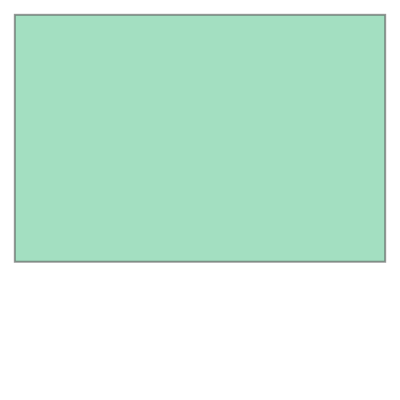

In [2]:
container = box(-2, -2, 4, 2)
container

In [3]:
with open('../shapes/random_polygons.json', 'r') as f:
    shapes = json.load(f)
    shapes = [shape(s) for s in shapes]

In [4]:
a = np.random.uniform(
    np.array(container.exterior.coords).min(axis=0).tolist() + [0],
    np.array(container.exterior.coords).max(axis=0).tolist() + [360],
    (len(shapes), 3)
)

In [5]:
a

array([[-5.57842082e-01, -2.13106846e-02,  1.90487539e+02],
       [ 7.04588259e-01, -6.15112581e-01,  2.04684125e+02],
       [-1.94502076e+00,  3.49247559e-01,  1.16937051e+02],
       [ 3.19708928e-01, -1.86685566e+00,  2.75479449e+02],
       [ 4.78239012e-01,  3.49053713e-01,  3.12816303e+02],
       [-1.34777895e+00,  9.10291544e-01,  3.57198949e+01],
       [-9.80974882e-01,  1.09618635e+00,  1.43411049e+02],
       [-1.27971339e+00,  2.03235452e-01,  2.91907533e+02],
       [ 1.34019883e+00, -1.28242558e+00,  2.78450069e+02],
       [ 2.28671036e+00,  1.68746814e+00,  2.10428124e+02],
       [-3.16074267e-01,  4.46961688e-01,  1.94819449e+02],
       [ 1.94647596e+00, -1.68025510e+00,  9.30042022e+01],
       [-1.23836041e+00,  1.71993647e+00,  6.41495164e+01],
       [ 7.63536027e-01,  1.22539120e+00,  2.91204059e+02],
       [ 7.92593932e-02, -1.72753670e+00,  3.16960978e+02],
       [ 3.49998914e+00,  1.59795624e+00,  2.56537092e+02],
       [-1.08975595e+00,  1.61393135e+00

In [6]:
packer = IrregularPackerStrict(container, shapes)

In [7]:
df = pd.DataFrame(a, columns=['x', 'y', 'r'])
df['item'] = shapes

In [8]:
df

,x,y,r,item
0,-0.557842,-0.021311,190.487539,"POLYGON ((-2 -1.5730739058132839, -1.937485187..."
1,0.704588,-0.615113,204.684125,POLYGON ((-1.4644019186390032 -1.4383775682409...
2,-1.945021,0.349248,116.937051,"POLYGON ((-1.1952677997522905 -2, -1.700903329..."
3,0.319709,-1.866856,275.479449,POLYGON ((-1.2996666932182652 -1.8217753634971...
4,0.478239,0.349054,312.816303,POLYGON ((-1.2275381968850894 -1.8854661061442...
...,...,...,...,...
145,1.425970,-0.084296,309.136110,POLYGON ((-0.5706640400306326 6.47610751285705...
146,-1.764815,1.653633,77.309712,"POLYGON ((-2 6.96469813120809, -1.793831620527..."
147,-0.169531,-0.616898,317.490553,POLYGON ((-1.1214166159867265 6.18520888581617...
148,1.319038,-1.635391,187.034000,POLYGON ((-1.6077203901194543 7.14636946640162...


In [9]:
df['item'] = df.apply(
    lambda r: rotate(
        translate(
            r['item'],
            r['x'] - r['item'].centroid.coords[0][0],
            r['y'] - r['item'].centroid.coords[0][1]
        ),
        r['r']
    ),
    axis=1
)

In [11]:
packer.drop_external(df)

,x,y,r,item
0,-0.557842,-0.021311,190.487539,POLYGON ((-0.2678824617631832 -0.2306832582451...
1,0.704588,-0.615113,204.684125,POLYGON ((0.6985249151413272 -0.90036669314749...
3,0.319709,-1.866856,275.479449,POLYGON ((0.4007238526800518 -1.86165970298325...
4,0.478239,0.349054,312.816303,POLYGON ((0.1259461956111109 0.508025591807451...
5,-1.347779,0.910292,35.719895,POLYGON ((-1.539490374616229 1.387859199457733...
...,...,...,...,...
140,2.054717,0.692176,211.294770,POLYGON ((1.9770683209647126 0.527697585538315...
142,-0.078941,-0.184847,258.747112,POLYGON ((0.1647213916921188 -0.18703443134540...
143,3.014022,1.459734,166.922986,POLYGON ((2.7787753094078513 1.340714539028924...
145,1.425970,-0.084296,309.136110,POLYGON ((1.9942712816547492 -0.25299766885297...


In [12]:
packer.drop_intersected(df)

,x,y,r,item,area
1,0.704588,-0.615113,204.684125,POLYGON ((0.6985249151413272 -0.90036669314749...,0.012659
3,0.319709,-1.866856,275.479449,POLYGON ((0.4007238526800518 -1.86165970298325...,0.015007
57,-0.511318,0.055296,256.426818,POLYGON ((-0.2236428300909167 0.10549176594049...,0.025339
128,0.915620,-1.535574,77.884984,POLYGON ((0.7583404208857462 -1.67731970892877...,0.062165
77,-0.667410,-0.531364,199.444051,POLYGON ((-0.3919461433514824 -0.7571901081927...,0.066287
112,2.323667,-0.008003,285.023437,POLYGON ((2.548150668321866 0.0081888848117018...,0.075139
97,3.529874,-1.045429,9.837756,POLYGON ((3.4203713716368624 -0.52844711809825...,0.100649
69,2.250790,0.704188,200.141162,POLYGON ((1.821551470585261 0.7095370506375909...,0.103753
51,2.776878,1.510371,280.761393,POLYGON ((2.3768490450526647 1.573242968984828...,0.113357
22,1.732043,0.933049,41.992936,POLYGON ((1.7565920940034707 0.620490725050534...,0.113660


In [13]:
packer.df = df

In [15]:
packer.score()

0.8292204556300297

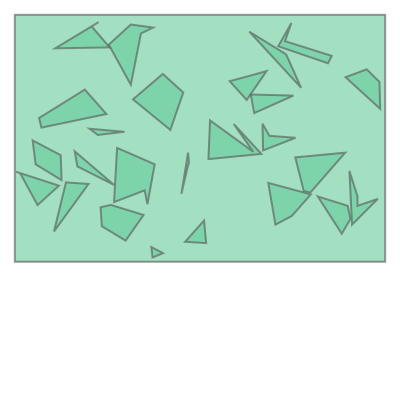

In [16]:
GeometryCollection([container, *df['item']])

In [38]:
global_optimum = 1
global_optimum_position = None
particle_optimum = []
particle_optimum_position = []
particle_position = []
particle_velocity = []
n_particles = 10
packer = IrregularPackerStrict(container, shapes)
for i in tqdm(range(n_particles)):
    initial_position = np.random.uniform(
        np.array(container.exterior.coords).min(axis=0).tolist() + [-180],
        np.array(container.exterior.coords).max(axis=0).tolist() + [180],
        (len(shapes), 3)
    )
    df = pd.DataFrame(initial_position, columns=['x', 'y', 'r'])
    df['item'] = shapes

    df['item'] = df.apply(
        lambda r: rotate(
            translate(
                r['item'],
                r['x'] - r['item'].centroid.coords[0][0],
                r['y'] - r['item'].centroid.coords[0][1]
            ),
            r['r']
        ),
        axis=1
    )

    particle_position.append(df.copy())
    particle_optimum_position.append(df.copy())

    df_feasible = packer.drop_external(df.copy())
    packer.drop_intersected(df_feasible)
    packer.df = df_feasible

    score = packer.score()
    particle_optimum.append(score)
    particle_velocity.append(
        np.random.uniform(
            np.array(container.exterior.coords).min(axis=0).tolist() + [-180],
            np.array(container.exterior.coords).max(axis=0).tolist() + [180],
            (len(shapes), 3)
        )
    )

    if score < global_optimum:
        global_optimum = score
        global_optimum_position = df.copy()

  0%|          | 0/10 [00:00<?, ?it/s]

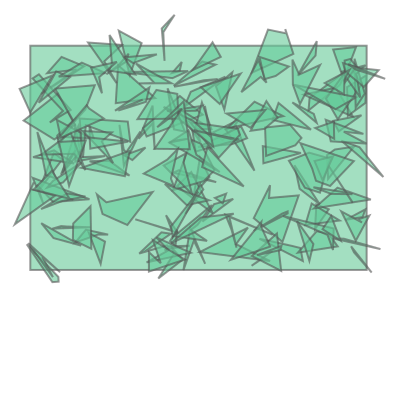

In [5]:
GeometryCollection([container, *global_optimum_position['item']])

In [24]:
phi_p = 1
phi_g = 1
w = 0.5

In [9]:
for _ in tqdm(range(10)):
    for i in tqdm(range(n_particles), leave=False):
        rp = np.random.uniform(0, 1, (len(shapes), 3))
        rg = np.random.uniform(0, 1, (len(shapes), 3))
        particle_velocity[i] = (
            w * particle_velocity[i] +
            phi_p * rp * (particle_optimum_position[i][['x', 'y', 'r']] -
                          particle_position[i][['x', 'y', 'r']]).values +

            phi_g * rg * (global_optimum_position[['x', 'y', 'r']] -
                          particle_position[i][['x', 'y', 'r']]).values
        )
        particle_velocity[i][:, 2] %= 180
        particle_position[i][['x', 'y', 'r']] += particle_velocity[i]

        particle_position[i]['item'] = particle_position[i].apply(
            lambda r: rotate(
                translate(
                    r['item'],
                    r['x'] - r['item'].centroid.coords[0][0],
                    r['y'] - r['item'].centroid.coords[0][1]
                ),
                r['r']
            ),
            axis=1
        )

        df_feasible = packer.drop_external(particle_position[i].copy())
        packer.drop_intersected(df_feasible)
        packer.df = df_feasible
        score = packer.score()

        if score < particle_optimum[i]:
            particle_optimum[i] = score
            particle_optimum_position[i] = particle_position[i].copy()

            if score < global_optimum:
                print('Nuevo óptimo:', score)
                global_optimum = score
                global_optimum_position = particle_position[i].copy()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

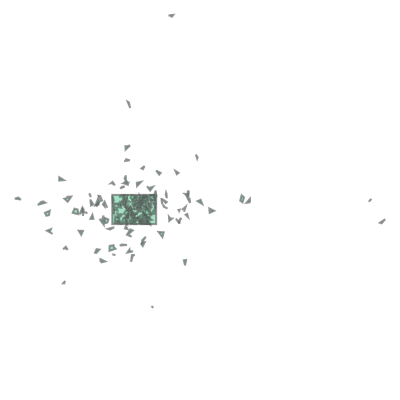

In [10]:
GeometryCollection([container, *global_optimum_position['item']])

In [ ]:
for _ in tqdm(range(10)):
    for i in tqdm(range(n_particles), leave=False):
        rp = np.random.uniform(0, 1, (len(shapes), 3))
        rg = np.random.uniform(0, 1, (len(shapes), 3))
        particle_velocity[i] = (
            w * particle_velocity[i] +
            phi_p * rp * (particle_optimum_position[i][['x', 'y', 'r']] -
                          particle_position[i][['x', 'y', 'r']]).values +

            phi_g * rg * (global_optimum_position[['x', 'y', 'r']] -
                          particle_position[i][['x', 'y', 'r']]).values
        )
        # particle_velocity[i][:, 2] %= 180
        particle_position[i]['r_old'] = particle_position[i]['r']
        particle_position[i][['x', 'y', 'r']] += particle_velocity[i]

        particle_position[i]['r'] = particle_position[i]['r'].apply(
            lambda x: x - 360 if x > 180 else x
        ).apply(
            lambda x: x + 360 if x < -180 else x
        )

        particle_position[i]['item'] = particle_position[i].apply(
            lambda r: rotate(
                translate(
                    r['item'],
                    r['x'] - r['item'].centroid.coords[0][0],
                    r['y'] - r['item'].centroid.coords[0][1]
                ),
                r['r'] - r['r_old']
            ),
            axis=1
        )

        df_feasible = packer.drop_external(particle_position[i].copy())
        packer.drop_intersected(df_feasible)
        packer.df = df_feasible
        score = packer.score()

        if score < particle_optimum[i]:
            items = particle_position[i]['item'].tolist()
            particle_packer = IrregularPacker(container, items)
            df = particle_packer.initialize_neighbors(items)
            df = particle_packer.calculate_areas(df)
            df = particle_packer.optimize(df)
            df_feasible = packer.drop_external(df.copy())
            packer.drop_intersected(df_feasible)
            packer.df = df_feasible
            score = packer.score()

            df['r'] = (df['r'] + particle_position[i]['r']).apply(
                lambda x: x - 360 if x > 180 else x
            ).apply(
                lambda x: x + 360 if x < -180 else x
            )

            particle_optimum[i] = score
            particle_optimum_position[i] = df[['x', 'y', 'r', 'item']].copy()

            if score < global_optimum:
                print('Nuevo óptimo:', score)
                global_optimum = score
                global_optimum_position = df[['x', 'y', 'r', 'item']].copy()

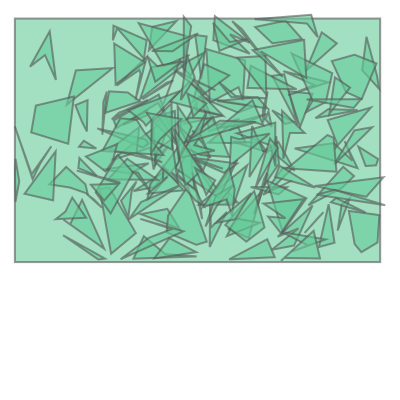

In [29]:
GeometryCollection([container, *global_optimum_position['item']])

In [30]:
global_optimum

0.6991522416986656

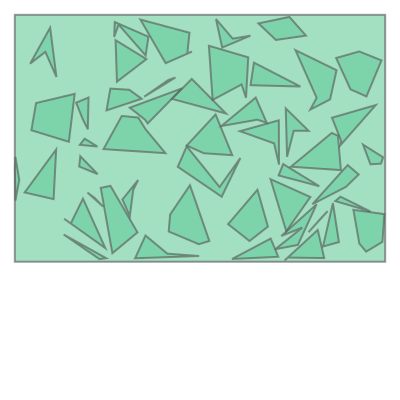

In [32]:
df = packer.drop_external(global_optimum_position.copy())
packer.drop_intersected(df)
GeometryCollection([container, *df['item']])

In [34]:
for _ in tqdm(range(10)):
    for i in tqdm(range(n_particles), leave=False):
        rp = np.random.uniform(0, 1, (len(shapes), 3))
        rg = np.random.uniform(0, 1, (len(shapes), 3))
        particle_velocity[i] = (
            w * particle_velocity[i] +
            phi_p * rp * (particle_optimum_position[i][['x', 'y', 'r']] -
                          particle_position[i][['x', 'y', 'r']]).values +

            phi_g * rg * (global_optimum_position[['x', 'y', 'r']] -
                          particle_position[i][['x', 'y', 'r']]).values
        )
        # particle_velocity[i][:, 2] %= 180
        particle_position[i]['r_old'] = particle_position[i]['r']
        particle_position[i][['x', 'y', 'r']] += particle_velocity[i]

        particle_position[i]['r'] = particle_position[i]['r'].apply(
            lambda x: x - 360 if x > 180 else x
        ).apply(
            lambda x: x + 360 if x < -180 else x
        )

        particle_position[i]['item'] = particle_position[i].apply(
            lambda r: rotate(
                translate(
                    r['item'],
                    r['x'] - r['item'].centroid.coords[0][0],
                    r['y'] - r['item'].centroid.coords[0][1]
                ),
                r['r'] - r['r_old']
            ),
            axis=1
        )

        df_feasible = packer.drop_external(particle_position[i].copy())
        packer.drop_intersected(df_feasible)
        packer.df = df_feasible
        score = packer.score()

        if score < particle_optimum[i]:
            items = particle_position[i]['item'].tolist()
            particle_packer = IrregularPacker(container, items)
            df = particle_packer.initialize_neighbors(items)
            df = particle_packer.calculate_areas(df)
            df = particle_packer.optimize(df)
            df_feasible = packer.drop_external(df.copy())
            packer.drop_intersected(df_feasible)
            packer.df = df_feasible
            score = packer.score()

            df['r'] = (df['r'] + particle_position[i]['r']).apply(
                lambda x: x - 360 if x > 180 else x
            ).apply(
                lambda x: x + 360 if x < -180 else x
            )

            particle_optimum[i] = score
            particle_optimum_position[i] = df[['x', 'y', 'r', 'item']].copy()

            if score < global_optimum:
                print('Nuevo óptimo:', score)
                global_optimum = score
                global_optimum_position = df[['x', 'y', 'r', 'item']].copy()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Nuevo óptimo: 0.7419238388549214
Nuevo óptimo: 0.7383297588139177
Nuevo óptimo: 0.7343494712215245


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Nuevo óptimo: 0.719123302935928


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

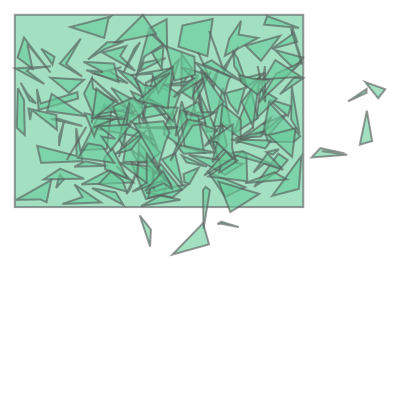

In [35]:
GeometryCollection([container, *global_optimum_position['item']])

In [36]:
global_optimum

0.719123302935928

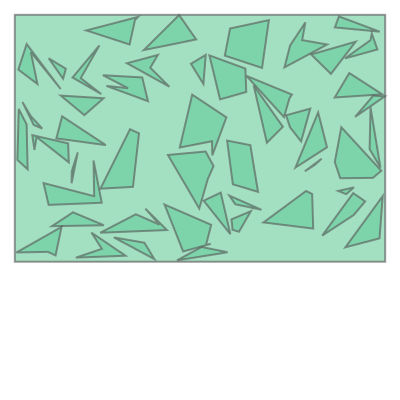

In [37]:
df = packer.drop_external(global_optimum_position.copy())
packer.drop_intersected(df)
GeometryCollection([container, *df['item']])

In [39]:
for _ in tqdm(range(10)):
    for i in tqdm(range(n_particles), leave=False):
        rp = np.random.uniform(0, 1, (len(shapes), 3))
        rg = np.random.uniform(0, 1, (len(shapes), 3))
        particle_velocity[i] = (
            w * particle_velocity[i] +
            phi_p * rp * (particle_optimum_position[i][['x', 'y', 'r']] -
                          particle_position[i][['x', 'y', 'r']]).values +

            phi_g * rg * (global_optimum_position[['x', 'y', 'r']] -
                          particle_position[i][['x', 'y', 'r']]).values
        )
        # particle_velocity[i][:, 2] %= 180
        particle_position[i]['r_old'] = particle_position[i]['r']
        particle_position[i][['x', 'y', 'r']] += particle_velocity[i]

        particle_position[i]['r'] = particle_position[i]['r'].apply(
            lambda x: x - 360 if x > 180 else x
        ).apply(
            lambda x: x + 360 if x < -180 else x
        )

        particle_position[i]['item'] = particle_position[i].apply(
            lambda r: rotate(
                translate(
                    r['item'],
                    r['x'] - r['item'].centroid.coords[0][0],
                    r['y'] - r['item'].centroid.coords[0][1]
                ),
                r['r'] - r['r_old']
            ),
            axis=1
        )

        df_feasible = packer.drop_external(particle_position[i].copy())
        packer.drop_intersected(df_feasible)
        packer.df = df_feasible
        score = packer.score()

        if score < particle_optimum[i]:
            items = particle_position[i]['item'].tolist()
            particle_packer = IrregularPacker(container, items, n_neighbors=10, step_portion=16)
            df = particle_packer.initialize_neighbors(items)
            df = particle_packer.calculate_areas(df)
            df = particle_packer.optimize(df)
            df_feasible = packer.drop_external(df.copy())
            packer.drop_intersected(df_feasible)
            packer.df = df_feasible
            score = packer.score()

            df['r'] = (df['r'] + particle_position[i]['r']).apply(
                lambda x: x - 360 if x > 180 else x
            ).apply(
                lambda x: x + 360 if x < -180 else x
            )

            particle_optimum[i] = score
            particle_optimum_position[i] = df[['x', 'y', 'r', 'item']].copy()

            if score < global_optimum:
                print('Nuevo óptimo:', score)
                global_optimum = score
                global_optimum_position = df[['x', 'y', 'r', 'item']].copy()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Nuevo óptimo: 0.7930346560096311
Nuevo óptimo: 0.7834677109245837


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

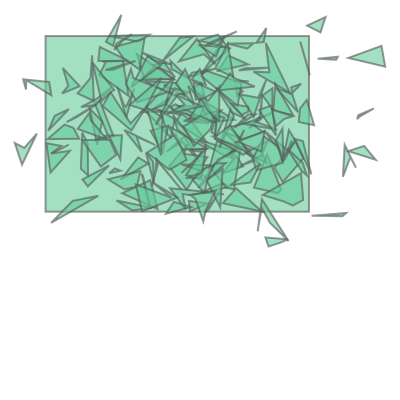

In [40]:
GeometryCollection([container, *global_optimum_position['item']])

In [41]:
global_optimum

0.7834677109245837

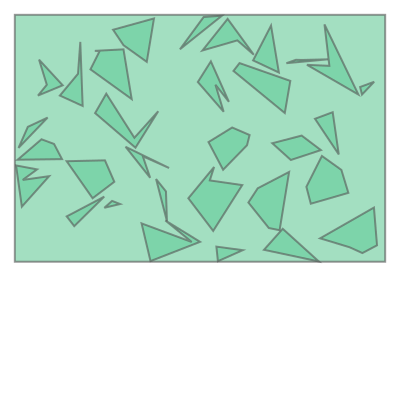

In [42]:
df = packer.drop_external(global_optimum_position.copy())
packer.drop_intersected(df)
GeometryCollection([container, *df['item']])